# Data Visualization – Assignment 2


In this homework, you will review and visualize data from the rpovided avalan dataset

# Your info

*First name:* Mehmood 

*Last name:* Munir

*Roll No:* 25I-7804

In [2]:
# the standard input statements
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Part 1: Load in data

Load in the provided file `avalan.csv` using the Pandas function.

Print few rows to get a sense of the data.

In [3]:
# your code here
df= pd.read_csv("avalan.csv")
df.head()

,Date,Region,Place,Trigger,Trigger: additional info,Weak Layer,Depth,Width,Vertical,Aspect,...,Buried - Fully,Injured,Killed,Accident and Rescue Summary,Terrain Summary,Weather Conditions and History,Comments 1,Comments 2,Comments 3,Comments 4
0,11/9/2012,Salt Lake,Sunset Peak,Snowboarder,Unintentionally Triggered,New Snow/Old Snow Interface,"14""",80',30',North,...,NaN,NaN,NaN,NaN,NaN,NaN,While it was a small avalanche that was I caug...,NaN,NaN,NaN
1,11/10/2012,Salt Lake,Pioneer Ridge,Skier,Remotely Triggered,Facets,2',20',125',North,...,NaN,NaN,NaN,NaN,NaN,NaN,Directly above cat track leading to lift. Cat...,NaN,NaN,NaN
2,11/10/2012,Salt Lake,Pioneer Bowl,Natural,NaN,Facets,NaN,NaN,NaN,North,...,NaN,NaN,NaN,NaN,NaN,NaN,"Looked and felt like winter today, nice to be ...",NaN,NaN,NaN
3,11/11/2012,Salt Lake,Patsy Marly,Skier,Unintentionally Triggered,New Snow/Old Snow Interface,2.5',100',100',North,...,NaN,NaN,NaN,NaN,NaN,NaN,A North facing aspect with an exposed ridge in...,NaN,NaN,NaN
4,11/11/2012,Salt Lake,Two Dogs,Skier,Remotely Triggered,Facets,3',70',450',North,...,NaN,NaN,NaN,NaN,NaN,NaN,Remotely triggered all the new storm snow (abo...,NaN,NaN,Additional comments by another backcountry obs...


## Part 2: Clean dates

You may notice that the dates of avalanes are provided in the `Date` column, however they are encoded as a string.

Additionally, we may want to analyze avalanes by year and by month, so let's create separate columns for those.

1. Convert the Date column to datetime format
2. Create a new column Year
3. Create a new column Month

In [4]:
# your code here


# Convert Date Column to datetime
df["Date"] = pd.to_datetime(df['Date'], format="%m/%d/%Y")

# Create a New Column Year
df["Year"] = df["Date"].apply(lambda x: x.year )
df["Year"] = pd.to_numeric(df["Year"]).astype('Int64')


# Create a New Column Month
df["Month"] = df["Date"].apply(lambda x: x.month )
df["Month"] = pd.to_numeric(df["Month"]).astype('Int64')


df.head()

,Date,Region,Place,Trigger,Trigger: additional info,Weak Layer,Depth,Width,Vertical,Aspect,...,Killed,Accident and Rescue Summary,Terrain Summary,Weather Conditions and History,Comments 1,Comments 2,Comments 3,Comments 4,Year,Month
0,2012-11-09,Salt Lake,Sunset Peak,Snowboarder,Unintentionally Triggered,New Snow/Old Snow Interface,"14""",80',30',North,...,NaN,NaN,NaN,NaN,While it was a small avalanche that was I caug...,NaN,NaN,NaN,2012,11
1,2012-11-10,Salt Lake,Pioneer Ridge,Skier,Remotely Triggered,Facets,2',20',125',North,...,NaN,NaN,NaN,NaN,Directly above cat track leading to lift. Cat...,NaN,NaN,NaN,2012,11
2,2012-11-10,Salt Lake,Pioneer Bowl,Natural,NaN,Facets,NaN,NaN,NaN,North,...,NaN,NaN,NaN,NaN,"Looked and felt like winter today, nice to be ...",NaN,NaN,NaN,2012,11
3,2012-11-11,Salt Lake,Patsy Marly,Skier,Unintentionally Triggered,New Snow/Old Snow Interface,2.5',100',100',North,...,NaN,NaN,NaN,NaN,A North facing aspect with an exposed ridge in...,NaN,NaN,NaN,2012,11
4,2012-11-11,Salt Lake,Two Dogs,Skier,Remotely Triggered,Facets,3',70',450',North,...,NaN,NaN,NaN,NaN,Remotely triggered all the new storm snow (abo...,NaN,NaN,Additional comments by another backcountry obs...,2012,11


## Part 3: Cleaning up Numerical Columns

You may also notice that numerical columns (`Elevation`, `Depth`, `Width`, `Vertical`) are encoded as strings. Moreover, some are in feet ('), while others are in inches (").

First, create a new column Elevation_Feet, with the Elevation column converted to a number, in feet

In [5]:
# your code here
df["Elevation_Feet"] = df["Elevation"].apply(lambda x: int(x[:-1].replace(',', '')) if type(x) == str else x)

Then, create three new columns in inches: 
   1. Depth_Inches, with the Depth column converted to a number, in inches
   2. Width_Inches, with the Width column converted to a number, in inches
   3. Vertical_Inches, with the Vertical column converted to a number, in inches

I recommend that you write a function that converts the string into a number and then use that function to clean up the columns. Note that you will also have to handle undefined (NaN) values.

In [6]:
# your code here
df["Depth_Inches"] = df["Depth"].apply(lambda x: float(x[:-1].replace(',', '')) if type(x) == str else x)
df["Width_Inches"] = df["Width"].apply(lambda x: float(x[:-1].replace(',', '')) if type(x) == str else x)
df["Vertical_Inches"] = df["Vertical"].apply(lambda x: float(x[:-1].replace(',', '')) if type(x) == str else x)

## Part 4: Plotting

4.1: Plot a histogram of the Depth_Inches variable using the built-in pandas plotting function. 

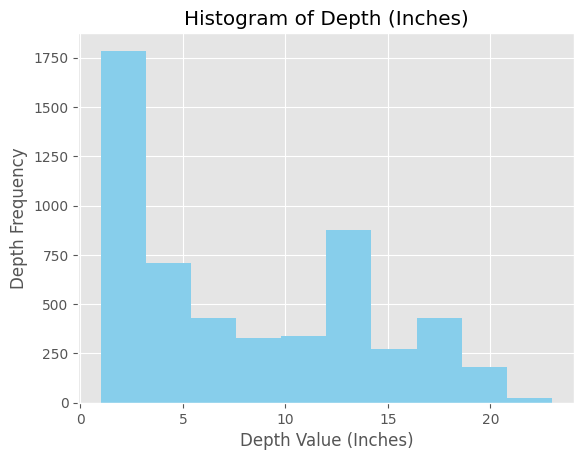

In [144]:
# your code here
# Plot histogram for column 'Depth_Inches'
df['Depth_Inches'].hist( color='skyblue')

# Add Labels and Title
plt.xlabel('Depth Value (Inches)')
plt.ylabel('Depth Frequency')
plt.title('Histogram of Depth (Inches)')

# Show the plot
plt.show()

4.2: Then plot a histogram of the elevation in feet variable.

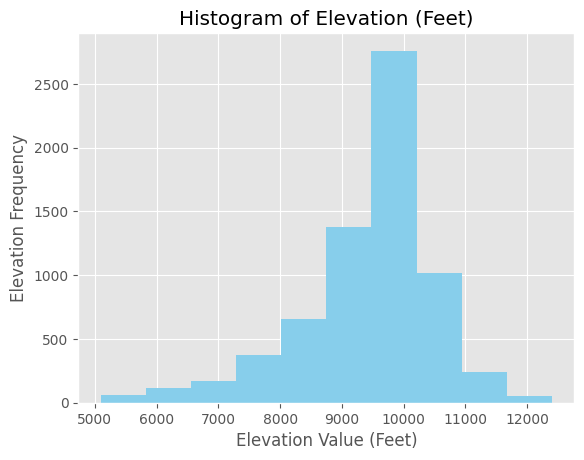

In [145]:
# your code here
# Plot histogram for column 'Depth_Inches'
df['Elevation_Feet'].hist( color='skyblue')


# Add Labels and Title
plt.xlabel('Elevation Value (Feet)')
plt.ylabel('Elevation Frequency')
plt.title('Histogram of Elevation (Feet)')

# Show the plot
plt.show()

4.3: Next, plot a bar chart of the number of avalanes by year
(Hint: You may find it useful to create a separate data frame, grouped by year.)

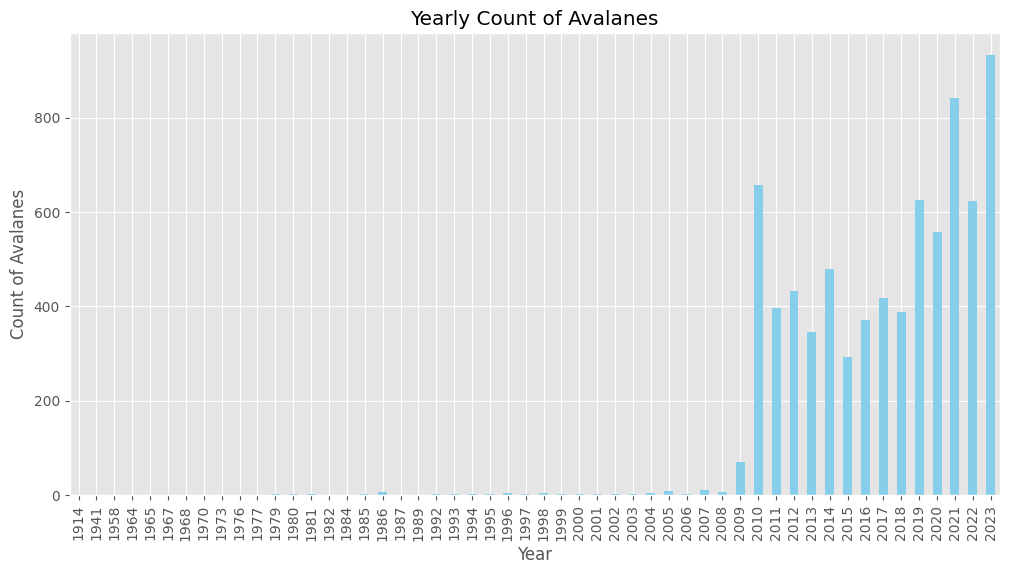

In [148]:
# your code here
# Group by Year and Count Values
df_yearly_grouped = df.groupby('Year')['Date'].count()

plt.figure(figsize=(12, 6))  

# Plot Bar Chart
df_yearly_grouped.plot(kind='bar', color='skyblue')


# Add Labels and Title
plt.xlabel('Year')
plt.ylabel('Count of Avalanes')
plt.title('Yearly Count of Avalanes')

# Show the Plot
plt.show()

4.4: Once you have done that, you will see that the Avalan Center does not have complete data for earlier years. Let's filter them out to see the barchart more clearly

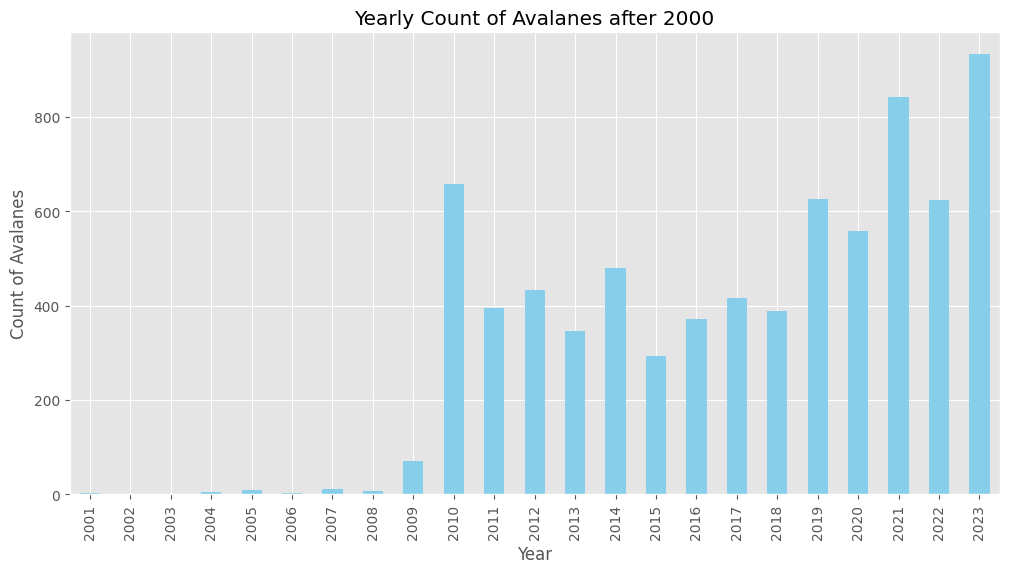

In [149]:
# your code here
# Group by Year and Count Values only after year 2000
df_yearly_grouped_latest = df[df["Year"] > 2000]
df_yearly_grouped_latest = df_yearly_grouped_latest.groupby('Year')['Date'].count()

plt.figure(figsize=(12, 6))  

# Plot Bar Chart
df_yearly_grouped_latest.plot(kind='bar', color='skyblue')


# Add Labels and Title
plt.xlabel('Year')
plt.ylabel('Count of Avalanes')
plt.title('Yearly Count of Avalanes after 2000')

# Show the Plot
plt.show()


4.5: Create a barchart of the number of avalanes per month
(Hint: You may find it useful to create a separate data frame, grouped by month.)

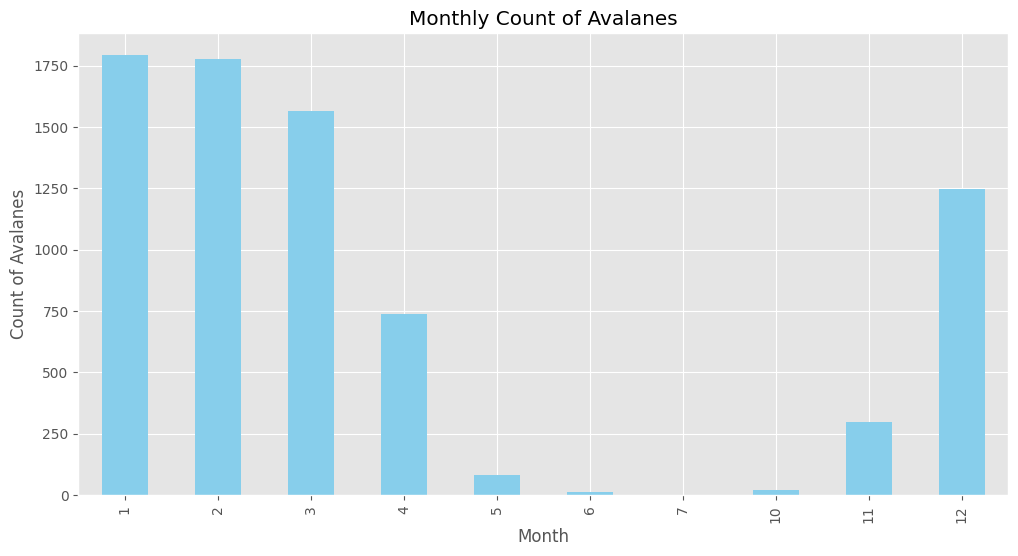

In [ ]:
# your code here
# Group by Month and Count Values
df_monthly_grouped = df.groupby('Month')['Date'].count()

plt.figure(figsize=(12, 6))  

# Plot Bar Chart
df_monthly_grouped.plot(kind='bar', color='skyblue')


# Add Labels and Title
plt.xlabel('Month')
plt.ylabel('Count of Avalanes')
plt.title('Monthly Count of Avalanes')

# Show the Plot
plt.show()

4.6: Create a boxplot of the elevation of avalanes by month

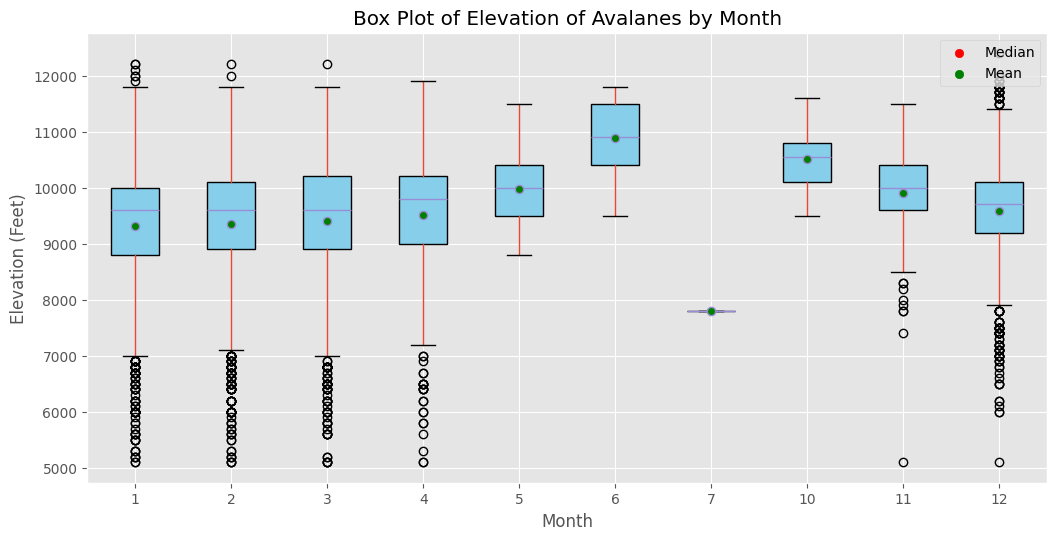

In [168]:
# your code here 
# Group by Month and then plot boxplot for Elevation 
df.boxplot(column='Elevation_Feet', by='Month', patch_artist=True, boxprops=dict(facecolor="skyblue"), figsize=(12,6), showmeans=True, meanprops={"marker": "o", "markerfacecolor": "green"})

# Add Labels and Title
plt.xlabel('Month')
plt.ylabel('Elevation (Feet)')
plt.title('Box Plot of Elevation of Avalanes by Month')
plt.suptitle('')  # Removes default 'Boxplot grouped by Year' title
plt.grid(True)

# Add Legend-like Annotation
plt.scatter([], [], color='red', label='Median')
plt.scatter([], [], color='green', label='Mean')
plt.legend(loc='upper right')

# Show the Plot
plt.show()

4.7:  Create a horizontal barchart of the number of avalanes by trigger

(Hint: You may find it useful to create a separate data frame, grouped by trigger.)

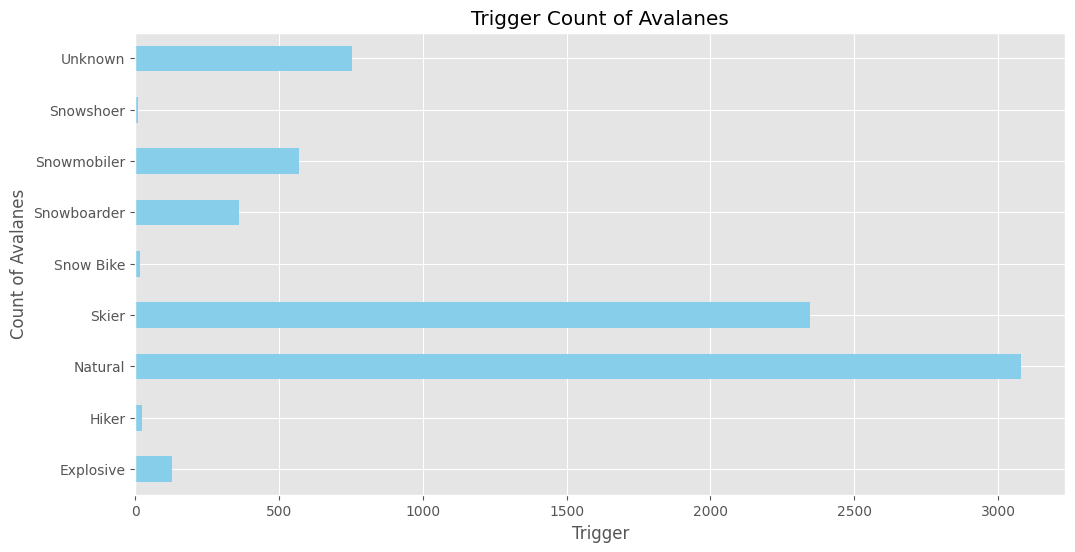

In [153]:
# your code here
# Group by Trigger and Count Values
df_trigger_grouped = df.groupby('Trigger')['Date'].count()

plt.figure(figsize=(12, 6))  

# Plot Bar Chart
df_trigger_grouped.plot(kind='barh', color='skyblue', )


# Add Labels and Title
plt.xlabel('Trigger')
plt.ylabel('Count of Avalanes')
plt.title('Trigger Count of Avalanes')

# Show the Plot
plt.show()


4.8: Create a boxplot of the depth of avalanes by trigger

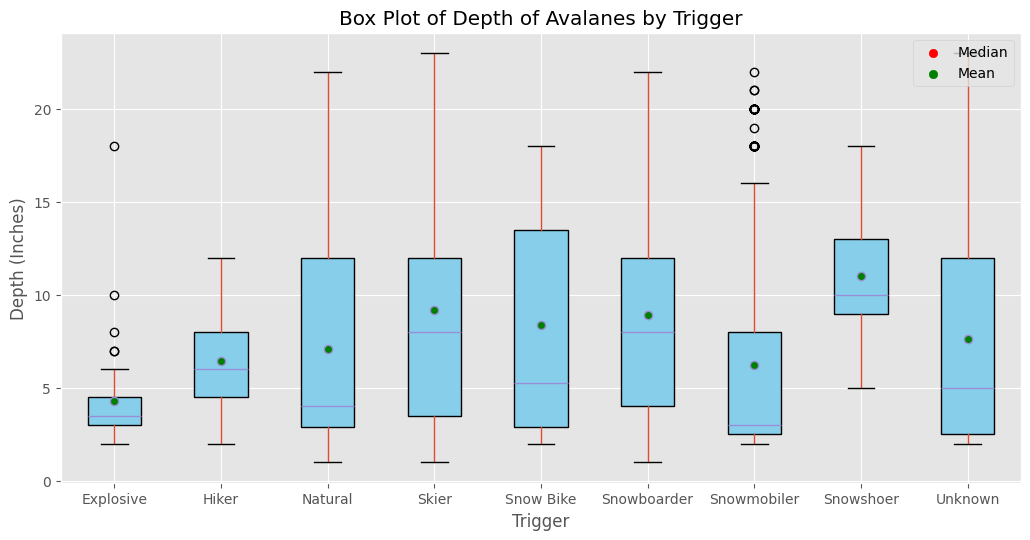

In [170]:
# your code here
# Group by Trigger and then plot boxplot for Depth 
df.boxplot(column='Depth_Inches', by='Trigger', patch_artist=True, boxprops=dict(facecolor="skyblue"), figsize=(12,6), showmeans=True, meanprops={"marker": "o", "markerfacecolor": "green"})

# Add Labels and Title
plt.xlabel('Trigger')
plt.ylabel('Depth (Inches)')
plt.title('Box Plot of Depth of Avalanes by Trigger')
plt.suptitle('')  # Removes default 'Boxplot grouped by Year' title
plt.grid(True)

# Add Legend-like Annotation
plt.scatter([], [], color='red', label='Median')
plt.scatter([], [], color='green', label='Mean')
plt.legend(loc='upper right')

# Show the Plot
plt.show()

# Part 5: Analysis – What did we learn?
Please answer the following questions in (brief) writing.

- What does the distribution of avalan depths and elevations look like? 
- What year had the most avalan? How many?
- What month had the most avalan? How many?
- What month gets the highest elevation avalanes? How many feet, on average?
- What is the most common avalan trigger?
- What avalan trigger yields the deepest avalanes? How many inches deep, on average?

Your Answer Here!
- Depth and Elevation distributions are totally different as shown in the histogram 4.1 and 4.2 respectively. Depth Distribution skewed towards left and Elevation distribution is quite normal distribution.
- Year 2023 had most avalan and total count of avalan in 2023 is 932 as shown in 4.4.
- Month 1(January) had the most avalan and total of avalan in January is 1793 as shown in 4.5.
- Month 6(June) gets the highest elevation avalanes  and average feet is almost close to 11000 as shown in 4.6.
- Natural as shown in 4.7
- Snow Bike trigger yields the deepest avalanes, and average avalanes depth is almost clost to 8 as shown in 4.8.


# Part 6: Are Avalanes with Fatalities Different?

Compare avalanes without and with fatalities using visualziations. Are there any differences you notice?#

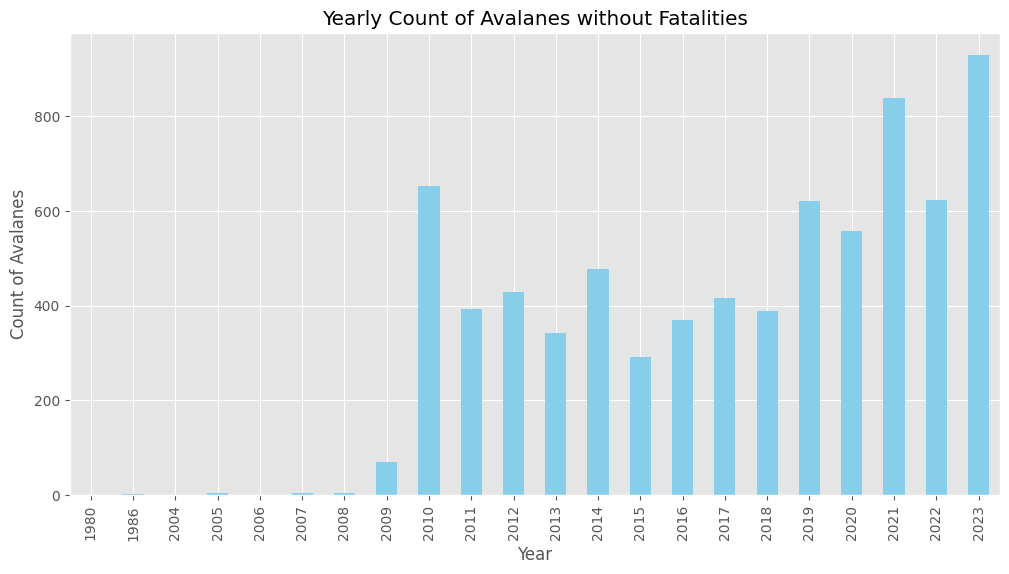

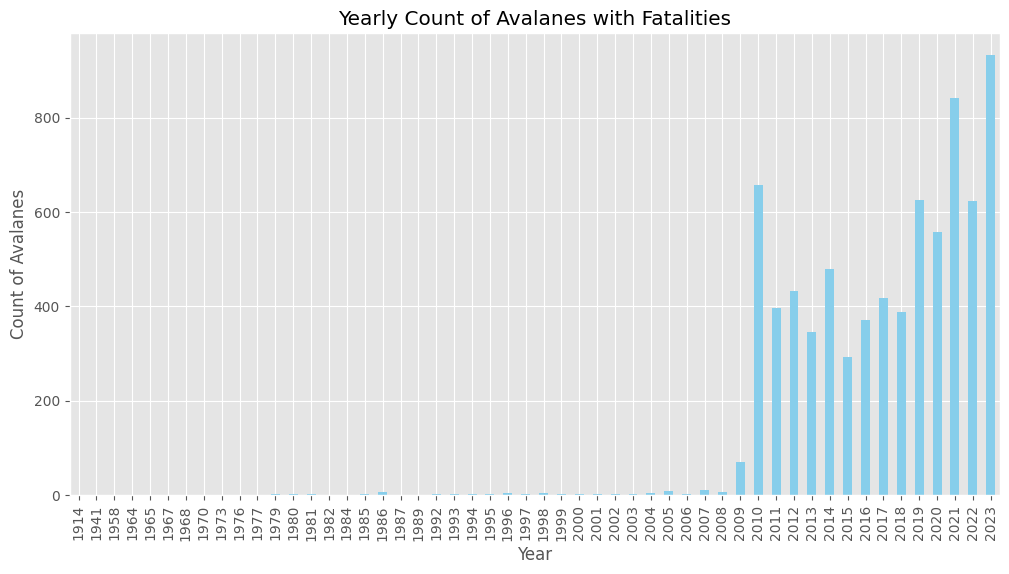

In [41]:
# your code here
# Group by Year and Count Values only after year 2000
df_without_fatalities = df[df["Killed"].isnull()]
df_without_fatalities = df_without_fatalities.groupby('Year')["Date"].count()

plt.figure(figsize=(12, 6))  

# Plot Bar Chart
df_without_fatalities.plot(kind='bar', color='skyblue')


# Add Labels and Title
plt.xlabel('Year')
plt.ylabel('Count of Avalanes')
plt.title('Yearly Count of Avalanes without Fatalities')

# Show the Plot
plt.show()

df_with_fatalities = df.groupby('Year')["Date"].count()

plt.figure(figsize=(12, 6))  

# Plot Bar Chart
df_with_fatalities.plot(kind='bar', color='skyblue')


# Add Labels and Title
plt.xlabel('Year')
plt.ylabel('Count of Avalanes')
plt.title('Yearly Count of Avalanes with Fatalities')

# Show the Plot
plt.show()


# Analysis
- Before 1980, each avalane have fatalities.
- After 1980, there might be some fatalities but trend is almost the same.

# Grading Scheme

Part 1: 5%  
Part 2: 15%  
Part 3: 20%  
Part 4: 35%,  
Part 5: 15%  
Part 6 : 10%  